In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Look into Dataset
housing_df = pd.read_csv('Housing.csv')
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## EDA (Exploratory Data Analytics)

### Look at Numerical Features

In [5]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


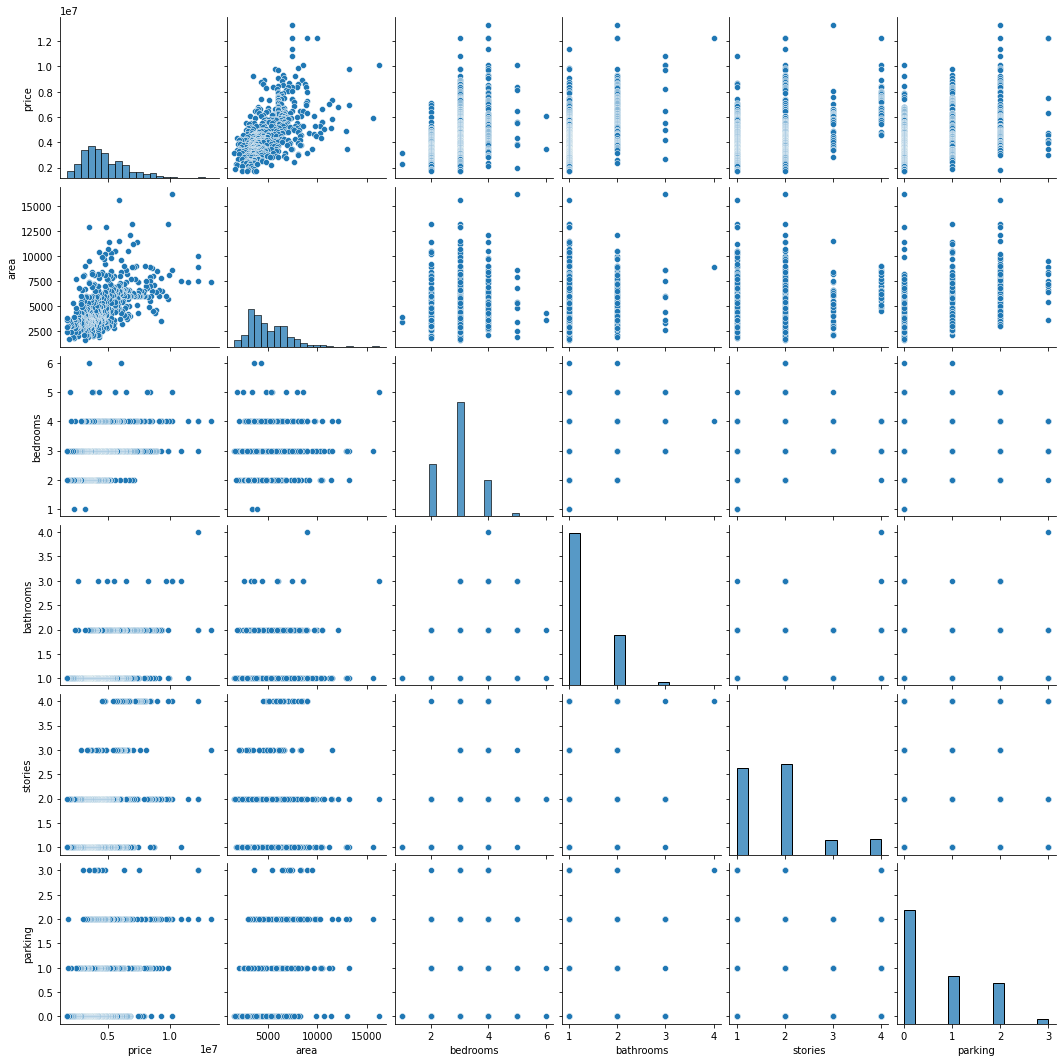

In [6]:
# Look at relationship of overall dataframe
sns.pairplot(housing_df)

c:\Users\Rithi\AppData\Roaming\SPB_Data\.virtualenvs\Rithi-sA_9Ju7I\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area'>

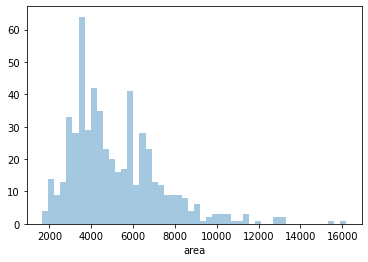

In [7]:
sns.distplot(housing_df['area'], kde=False, bins=50)


The area is left skewed with majority of the area to be between 2000 to 7000 acres.

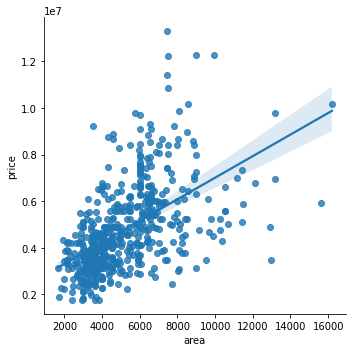

In [8]:
sns.lmplot(x='area', y='price', data=housing_df)


There is a positive relationship between the area and the price.

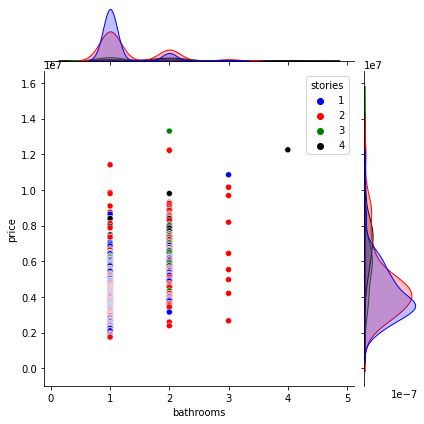

In [9]:
sns.color_palette("rocket", as_cmap=True)
sns.jointplot(x='bathrooms', y='price', data=housing_df, hue='stories', kind='scatter', palette={1: 'blue', 2: 'red', 3: 'green', 4: 'black'})

As shown in the graph above, it can be seen that the majority of bathrooms with 2 stories have a higher price point when compared to bathrooms with fewers stories.

### Looking at Categorical Features

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

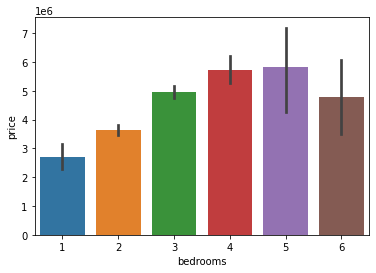

In [10]:
sns.barplot(x='bedrooms', y='price', data=housing_df)

There is a slightly positive relationship where the number of bedrooms does affect the price.

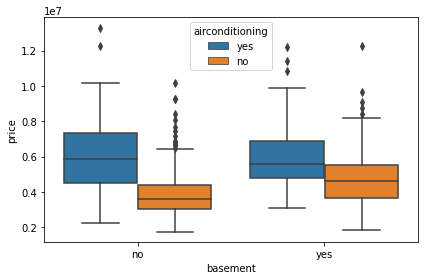

In [11]:
sns.boxplot(x='basement', y='price', data=housing_df, hue='airconditioning')
plt.tight_layout()

There are slightly greater outliers for houses without a basement, but generally houses with a basement have a slightly higher price than houses without a basement. Furthermore, houses with air conditioning tend to have a higher price in either case.

<AxesSubplot:xlabel='hotwaterheating', ylabel='price'>

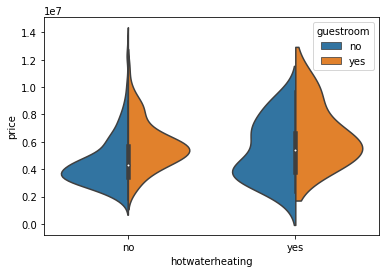

In [12]:
sns.violinplot(x='hotwaterheating',y='price', data=housing_df, hue='guestroom',split=True)

As can be seen in the violinplot, there is more area on the curve with hot water heating and a guest room, thus there is a higher price point in that region.  

## Feature Engineering

### Missing Values

In [13]:
housing_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

As seen, there are no null values in this dataset.

<AxesSubplot:>

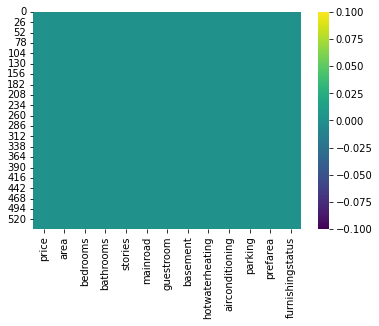

In [14]:
sns.heatmap(housing_df.isnull(),cmap='viridis')

### Look at Outliers

<AxesSubplot:>

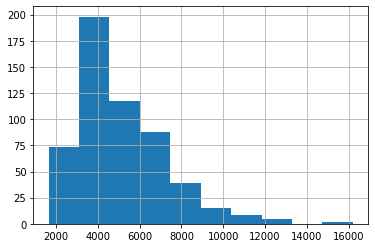

In [15]:
housing_df['area'].hist()

In [16]:
quartile_1 = housing_df['area'].describe()['25%']
quartile_3 = housing_df['area'].describe()['75%']

In [17]:
iqr = quartile_3 - quartile_1
outliers = []
for val in housing_df['area']:
    
    if val > (quartile_3 + (iqr * 1.5)):
        outliers.append(val)
    elif val < (quartile_1 - (iqr * 1.5)):
        outliers.append(val)


In [18]:
outliers

[16200,
 13200,
 11440,
 11175,
 13200,
 12090,
 15600,
 11460,
 11410,
 10700,
 12900,
 12944]

In [19]:
housing_df['area_outliers'] = housing_df.area.isin(outliers)
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_outliers
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,False
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,False
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,False
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,False
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,False


In [20]:
housing_df=housing_df[housing_df.area_outliers==False]
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_outliers
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,False
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,False
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,False
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,False
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,False


In [21]:
housing_df.drop('area_outliers', axis=1, inplace=True)

c:\Users\Rithi\AppData\Roaming\SPB_Data\.virtualenvs\Rithi-sA_9Ju7I\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Categorical Encoding

In [22]:
## Looking at unique values
print(housing_df['mainroad'].unique())
print(housing_df['guestroom'].unique())
print(housing_df['basement'].unique())
print(housing_df['hotwaterheating'].unique())
print(housing_df['airconditioning'].unique())
print(housing_df['prefarea'].unique())
print(housing_df['furnishingstatus'].unique())

['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['furnished' 'semi-furnished' 'unfurnished']


In [23]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#ohe = OneHotEncoder()
le = LabelEncoder()

housing_df['airconditioning_labeled'] = le.fit_transform(housing_df['airconditioning'])


housing_df['mainroad_labeled'] = le.fit_transform(housing_df['mainroad'])


housing_df['guestroom_labeled'] = le.fit_transform(housing_df['guestroom'])


housing_df['basement_labeled'] = le.fit_transform(housing_df['basement'])

housing_df['hotwaterheating_labeled'] = le.fit_transform(housing_df['hotwaterheating'])

housing_df['furnishingstatus_labeled'] = le.fit_transform(housing_df['furnishingstatus'])
housing_df.head()


c:\Users\Rithi\AppData\Roaming\SPB_Data\.virtualenvs\Rithi-sA_9Ju7I\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\Users\Rithi\AppData\Roaming\SPB_Data\.virtualenvs\Rithi-sA_9Ju7I\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Rithi\AppData\Roaming\SPB_Data\.virtualenvs\Rithi-sA_9Ju7I\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,airconditioning_labeled,mainroad_labeled,guestroom_labeled,basement_labeled,hotwaterheating_labeled,furnishingstatus_labeled
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,1,0,0,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,1,0,0,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0,1,0,1,0,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,1,0,1,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,1,1,1,0,0


In [24]:
housing_df.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'],axis=1,inplace=True)

c:\Users\Rithi\AppData\Roaming\SPB_Data\.virtualenvs\Rithi-sA_9Ju7I\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,parking,airconditioning_labeled,mainroad_labeled,guestroom_labeled,basement_labeled,hotwaterheating_labeled,furnishingstatus_labeled
0,13300000,7420,4,2,3,2,1,1,0,0,0,0
1,12250000,8960,4,4,4,3,1,1,0,0,0,0
2,12250000,9960,3,2,2,2,0,1,0,1,0,1
3,12215000,7500,4,2,2,3,1,1,0,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,1,0,0


In [26]:
# Dropping Duplicate Rows
print(housing_df.shape)
housing_df = housing_df.drop_duplicates(subset=housing_df.columns.to_list())
housing_df.head()
print(housing_df.shape)

(533, 12)
(533, 12)


## Feature Selection

In [27]:
## Look at Highly correlated Features
housing_df.corr()

,price,area,bedrooms,bathrooms,stories,parking,airconditioning_labeled,mainroad_labeled,guestroom_labeled,basement_labeled,hotwaterheating_labeled,furnishingstatus_labeled
price,1.000000,0.549898,0.360821,0.523560,0.431600,0.384599,0.463609,0.295076,0.272106,0.183040,0.091093,-0.303018
area,0.549898,1.000000,0.148307,0.226712,0.119051,0.379151,0.274750,0.304678,0.195351,0.051724,-0.030535,-0.163787
bedrooms,0.360821,0.148307,1.000000,0.362699,0.412939,0.140784,0.168110,-0.014761,0.084873,0.103469,0.060854,-0.135711
bathrooms,0.523560,0.226712,0.362699,1.000000,0.328777,0.188998,0.197589,0.043823,0.131347,0.115073,0.074431,-0.158674
stories,0.431600,0.119051,0.412939,0.328777,1.000000,0.047276,0.302419,0.124143,0.041314,-0.173534,0.026930,-0.110624
parking,0.384599,0.379151,0.140784,0.188998,0.047276,1.000000,0.156199,0.203403,0.046956,0.053294,0.069166,-0.166367
airconditioning_labeled,0.463609,0.274750,0.168110,0.197589,0.302419,0.156199,1.000000,0.107971,0.142281,0.042501,-0.128515,-0.150511
mainroad_labeled,0.295076,0.304678,-0.014761,0.043823,0.124143,0.203403,0.107971,1.000000,0.095388,0.043336,-0.013713,-0.154303
guestroom_labeled,0.272106,0.195351,0.084873,0.131347,0.041314,0.046956,0.142281,0.095388,1.000000,0.373862,-0.007598,-0.125925
basement_labeled,0.183040,0.051724,0.103469,0.115073,-0.173534,0.053294,0.042501,0.043336,0.373862,1.000000,-0.007123,-0.107190


In [28]:
for row in housing_df.corr():
    for col in housing_df.corr():
        if np.abs(housing_df.corr()[row][col]) > 0.7:
            print(row, col)

price price
area area
bedrooms bedrooms
bathrooms bathrooms
stories stories
parking parking
airconditioning_labeled airconditioning_labeled
mainroad_labeled mainroad_labeled
guestroom_labeled guestroom_labeled
basement_labeled basement_labeled
hotwaterheating_labeled hotwaterheating_labeled
furnishingstatus_labeled furnishingstatus_labeled


## Splitting Data

In [29]:
X = housing_df.drop('price', axis = 1)
y = housing_df['price']


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)


In [31]:
X_train.shape

(373, 11)

In [32]:
X_test.shape

(160, 11)

## Model Building

In [33]:
import xgboost as xgb
reg_model = xgb.XGBRegressor()
reg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

## Evaluating Model

In [34]:
predictions = reg_model.predict(X_test)
metric_dct = {'calculated': predictions,
             'real': y_test}
metric_df = pd.DataFrame(metric_dct)

In [35]:
metric_df.head()

,calculated,real
113,5511033.0,6083000
9,6585377.5,9800000
106,5489695.5,6160000
398,3676470.5,3500000
325,4220600.0,4007500


In [36]:
metric_df.describe()

,calculated,real
count,1.600000e+02,1.600000e+02
mean,4.882639e+06,4.776818e+06
std,1.573058e+06,1.796482e+06
min,2.003573e+06,1.750000e+06
25%,3.701824e+06,3.500000e+06
50%,4.713435e+06,4.392500e+06
75%,5.794357e+06,5.635000e+06
max,1.040127e+07,1.225000e+07


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, predictions)

990844.24296875

In [38]:
mean_squared_error(y_test, predictions)

2017266791789.3618

c:\Users\Rithi\AppData\Roaming\SPB_Data\.virtualenvs\Rithi-sA_9Ju7I\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

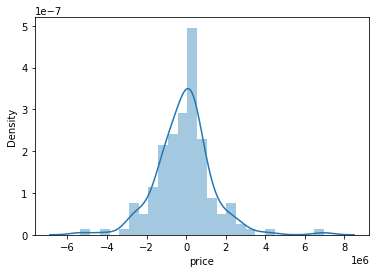

In [39]:
sns.distplot((y_test - predictions))

In [40]:
import joblib
joblib.dump(reg_model, 'Housing_Price.pkl')

['Housing_Price.pkl']

In [41]:
reg_model.save_model('Housing_Price.json')

In [ ]:
y